In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel('flight_fare.xlsx')

In [3]:
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


## INFORMATION ABOUR DATAFRAME

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


## EDA

#### MISSING VALUES

In [5]:
for features in df.columns:
    print(f"{features}:{df[features].isnull().sum()}")

Airline:0
Date_of_Journey:0
Source:0
Destination:0
Route:1
Dep_Time:0
Arrival_Time:0
Duration:0
Total_Stops:1
Additional_Info:0
Price:0


In [6]:
## storing nan valued features

In [7]:
feature_with_nan=[features for features in df.columns if df[features].isnull().sum()>0]

In [8]:
feature_with_nan

['Route', 'Total_Stops']

### PERCENTAGE OF NAN VALUE PRESENT

In [9]:
for features in feature_with_nan:
    print(f"{features}:{df[features].isnull().sum()/df.shape[0]}")

Route:9.360666479453337e-05
Total_Stops:9.360666479453337e-05


In [10]:
## here the missing value is very less

## NUMERICAL VARIABLES

In [11]:
numerical_features=[features for features in df.columns if(df[features].dtypes!='O')]

In [12]:
numerical_features

['Price']

In [13]:
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [14]:
## THE NO OF UNIQUE VALUE PRESENT

In [15]:
len(df['Price'].unique())

1870

In [16]:
## TO SEE THE DISTRIBUTION OF THE Price

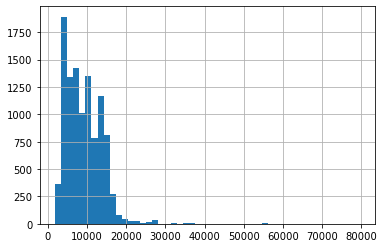

In [17]:
df['Price'].hist(bins=50)
plt.show()

In [18]:
df['Price']=np.log(df['Price']+1)

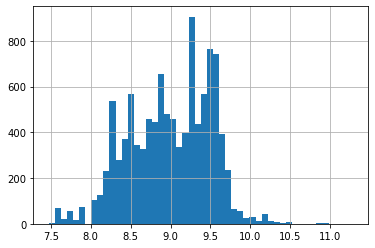

In [19]:
df['Price'].hist(bins=50)
plt.show()

## CATEGORICAL VARIABLES

In [20]:
categorical_features=[features for features in df.columns if(df[features].dtypes=='O')]

In [21]:
categorical_features

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

## NO OF CATEGORICAL FEATURES ARE

In [22]:
print(f"no of categorical features are :{len(categorical_features)}")

no of categorical features are :10


In [23]:
df[categorical_features].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


## CARDINALITY OF CATEGORICALS FEATURES ARE 

In [24]:
for features in categorical_features:
    print(f"{features}:{len(df[features].unique())}")

Airline:12
Date_of_Journey:44
Source:5
Destination:6
Route:129
Dep_Time:222
Arrival_Time:1343
Duration:368
Total_Stops:6
Additional_Info:10


## relationship between the categorical features and dependent features 

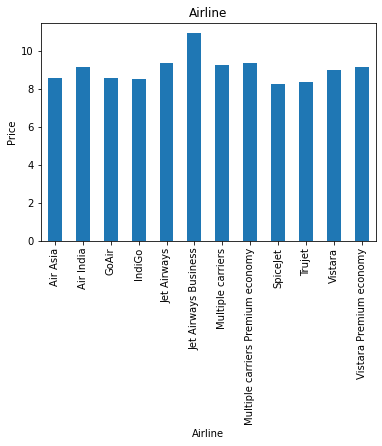

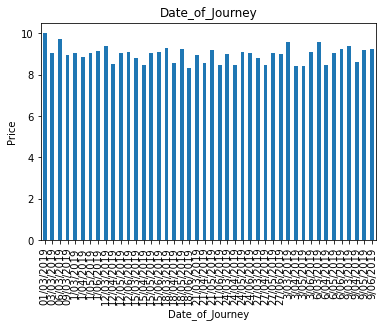

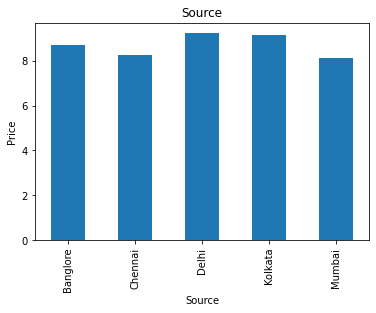

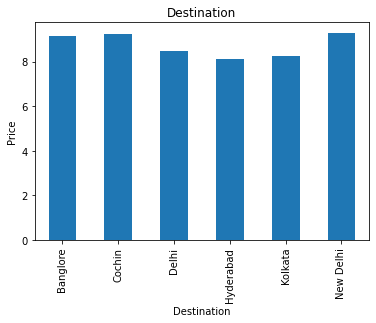

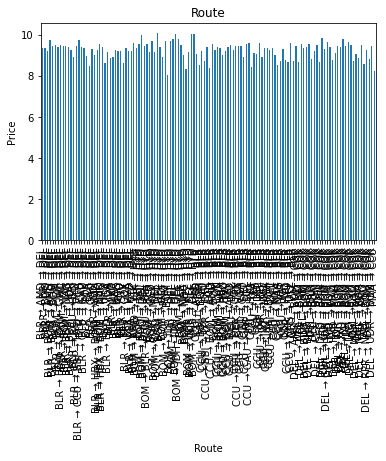

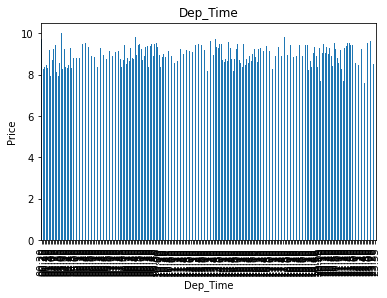

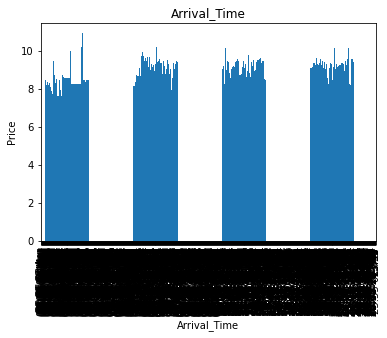

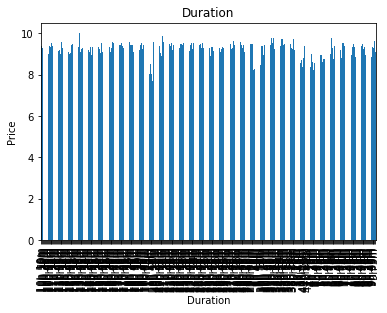

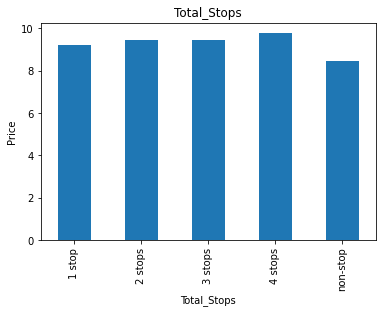

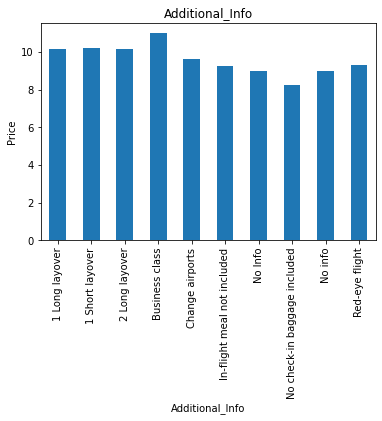

In [25]:
for features in categorical_features:
    df.groupby(features)['Price'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Price')
    plt.title(features)
    plt.show()

## FEATURE ENGINEERING

#### handling missing values

In [26]:
# let us capture all the nan values 
## first lets handle categorical which are missing
feature_nan=[features for features in df.columns if(df[features].dtypes=='O' and df[features].isnull().sum()>0)]

In [27]:
feature_nan

['Route', 'Total_Stops']

In [28]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [29]:
df['Route'].fillna(df['Route'].mode().values[0],inplace=True)

In [30]:
df['Total_Stops'].fillna(df['Total_Stops'].mode().values[0],inplace=True)

In [31]:
df[feature_nan].isnull().sum()

Route          0
Total_Stops    0
dtype: int64

## Handling Rare categorical features

In [32]:
categorical_features

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [33]:
for feature in categorical_features:
    temp=df.groupby(feature)['Price'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [34]:
df[categorical_features].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,Rare_var,Rare_var,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,Rare_var,Rare_var,Rare_var,Rare_var,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,Rare_var,Rare_var,Rare_var,Rare_var,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,Rare_var,Rare_var,Rare_var,Rare_var,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,Rare_var,Rare_var,Rare_var,Rare_var,1 stop,No info


In [35]:
for features in categorical_features:
    print(f"{features}:{len(df[features].unique())}")

Airline:9
Date_of_Journey:32
Source:5
Destination:6
Route:15
Dep_Time:29
Arrival_Time:9
Duration:12
Total_Stops:4
Additional_Info:4


## ENCODING TECHNIQUES

## Airline

In [36]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Rare_var'],
      dtype=object)

In [37]:
A=pd.get_dummies(df['Airline'],drop_first=True)

In [38]:
df=pd.concat([df,A],axis=1)

In [39]:
df.drop(['Airline'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_of_Journey    10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Route              10683 non-null  object 
 4   Dep_Time           10683 non-null  object 
 5   Arrival_Time       10683 non-null  object 
 6   Duration           10683 non-null  object 
 7   Total_Stops        10683 non-null  object 
 8   Additional_Info    10683 non-null  object 
 9   Price              10683 non-null  float64
 10  Air India          10683 non-null  uint8  
 11  GoAir              10683 non-null  uint8  
 12  IndiGo             10683 non-null  uint8  
 13  Jet Airways        10683 non-null  uint8  
 14  Multiple carriers  10683 non-null  uint8  
 15  Rare_var           10683 non-null  uint8  
 16  SpiceJet           106

In [41]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source             10683 non-null  object 
 1   Destination        10683 non-null  object 
 2   Route              10683 non-null  object 
 3   Dep_Time           10683 non-null  object 
 4   Arrival_Time       10683 non-null  object 
 5   Duration           10683 non-null  object 
 6   Total_Stops        10683 non-null  object 
 7   Additional_Info    10683 non-null  object 
 8   Price              10683 non-null  float64
 9   Air India          10683 non-null  uint8  
 10  GoAir              10683 non-null  uint8  
 11  IndiGo             10683 non-null  uint8  
 12  Jet Airways        10683 non-null  uint8  
 13  Multiple carriers  10683 non-null  uint8  
 14  Rare_var           10683 non-null  uint8  
 15  SpiceJet           10683 non-null  uint8  
 16  Vistara            106

## SOURCE

In [43]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
S=pd.get_dummies(df['Source'],drop_first=True)

In [45]:
df=pd.concat([df,S],axis=1)

In [46]:
df.drop(['Source'],axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Destination        10683 non-null  object 
 1   Route              10683 non-null  object 
 2   Dep_Time           10683 non-null  object 
 3   Arrival_Time       10683 non-null  object 
 4   Duration           10683 non-null  object 
 5   Total_Stops        10683 non-null  object 
 6   Additional_Info    10683 non-null  object 
 7   Price              10683 non-null  float64
 8   Air India          10683 non-null  uint8  
 9   GoAir              10683 non-null  uint8  
 10  IndiGo             10683 non-null  uint8  
 11  Jet Airways        10683 non-null  uint8  
 12  Multiple carriers  10683 non-null  uint8  
 13  Rare_var           10683 non-null  uint8  
 14  SpiceJet           10683 non-null  uint8  
 15  Vistara            10683 non-null  uint8  
 16  Chennai            106

## Destinations

In [48]:
D=pd.get_dummies(df['Destination'],drop_first=True)

In [49]:
df=pd.concat([df,D],axis=1)

In [50]:
df.drop(['Destination'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  object 
 1   Dep_Time           10683 non-null  object 
 2   Arrival_Time       10683 non-null  object 
 3   Duration           10683 non-null  object 
 4   Total_Stops        10683 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  float64
 7   Air India          10683 non-null  uint8  
 8   GoAir              10683 non-null  uint8  
 9   IndiGo             10683 non-null  uint8  
 10  Jet Airways        10683 non-null  uint8  
 11  Multiple carriers  10683 non-null  uint8  
 12  Rare_var           10683 non-null  uint8  
 13  SpiceJet           10683 non-null  uint8  
 14  Vistara            10683 non-null  uint8  
 15  Chennai            10683 non-null  uint8  
 16  Delhi              106

## Route

In [52]:
df['Route'].unique()

array(['BLR → DEL', 'Rare_var', 'CCU → BLR', 'BLR → BOM → DEL',
       'DEL → BOM → COK', 'DEL → BLR → COK', 'MAA → CCU',
       'CCU → BOM → BLR', 'DEL → AMD → BOM → COK', 'DEL → HYD → COK',
       'DEL → COK', 'CCU → DEL → BLR', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → JAI → BOM → COK'], dtype=object)

In [53]:
new_df=df.groupby('Route')['Price'].mean().sort_values(ascending=False).index


In [54]:
for i,j in enumerate(new_df):
    df.replace(j,i,inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  int64  
 1   Dep_Time           10683 non-null  object 
 2   Arrival_Time       10683 non-null  object 
 3   Duration           10683 non-null  object 
 4   Total_Stops        10683 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  float64
 7   Air India          10683 non-null  uint8  
 8   GoAir              10683 non-null  uint8  
 9   IndiGo             10683 non-null  uint8  
 10  Jet Airways        10683 non-null  uint8  
 11  Multiple carriers  10683 non-null  uint8  
 12  Rare_var           10683 non-null  uint8  
 13  SpiceJet           10683 non-null  uint8  
 14  Vistara            10683 non-null  uint8  
 15  Chennai            10683 non-null  uint8  
 16  Delhi              106

## Dep_Time

In [56]:
df['Dep_Time'].unique()

array([6, '09:00', '18:55', '08:00', '09:45', '11:40', '21:10', '07:00',
       '07:05', '05:45', '09:35', '08:20', '06:30', '14:05', '08:25',
       '20:25', '16:55', '20:00', '11:30', '06:00', '16:30', '13:00',
       '17:00', '10:00', '07:10', '05:30', '10:20', '17:45', '22:50'],
      dtype=object)

In [57]:
def encoding(df,variable):
    l=df.groupby(variable)['Price'].mean().sort_values(ascending=False).index
    for i,j in enumerate(l):
        df.replace(j,i,inplace=True)

In [58]:
encoding(df,'Dep_Time')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  int64  
 1   Dep_Time           10683 non-null  int64  
 2   Arrival_Time       10683 non-null  object 
 3   Duration           10683 non-null  object 
 4   Total_Stops        10683 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  float64
 7   Air India          10683 non-null  uint8  
 8   GoAir              10683 non-null  uint8  
 9   IndiGo             10683 non-null  uint8  
 10  Jet Airways        10683 non-null  uint8  
 11  Multiple carriers  10683 non-null  uint8  
 12  Rare_var           10683 non-null  uint8  
 13  SpiceJet           10683 non-null  uint8  
 14  Vistara            10683 non-null  uint8  
 15  Chennai            10683 non-null  uint8  
 16  Delhi              106

## Arrival_Time

In [60]:
df['Arrival_Time'].unique()

array([22, '19:15', '12:35', '21:00', '19:00', '20:45', '22:30', '18:50',
       '16:10'], dtype=object)

In [61]:
encoding(df,'Arrival_Time')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  int64  
 1   Dep_Time           10683 non-null  int64  
 2   Arrival_Time       10683 non-null  int64  
 3   Duration           10683 non-null  object 
 4   Total_Stops        10683 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  float64
 7   Air India          10683 non-null  uint8  
 8   GoAir              10683 non-null  uint8  
 9   IndiGo             10683 non-null  uint8  
 10  Jet Airways        10683 non-null  uint8  
 11  Multiple carriers  10683 non-null  uint8  
 12  Rare_var           10683 non-null  uint8  
 13  SpiceJet           10683 non-null  uint8  
 14  Vistara            10683 non-null  uint8  
 15  Chennai            10683 non-null  uint8  
 16  Delhi              106

## Duration

In [63]:
df['Duration'].unique()

array(['2h 50m', 5, '2h 35m', '2h 15m', '2h 55m', '2h 30m', '2h 45m',
       '3h', '1h 30m', '1h 25m', '2h 40m', '2h 20m'], dtype=object)

In [64]:
encoding(df,'Duration')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  int64  
 1   Dep_Time           10683 non-null  int64  
 2   Arrival_Time       10683 non-null  int64  
 3   Duration           10683 non-null  int64  
 4   Total_Stops        10683 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  float64
 7   Air India          10683 non-null  uint8  
 8   GoAir              10683 non-null  uint8  
 9   IndiGo             10683 non-null  uint8  
 10  Jet Airways        10683 non-null  uint8  
 11  Multiple carriers  10683 non-null  uint8  
 12  Rare_var           10683 non-null  uint8  
 13  SpiceJet           10683 non-null  uint8  
 14  Vistara            10683 non-null  uint8  
 15  Chennai            10683 non-null  uint8  
 16  Delhi              106

## Total_Stops

In [66]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', 0], dtype=object)

In [67]:
T=pd.get_dummies(df['Total_Stops'],drop_first=True)

In [68]:
df=pd.concat([df,T],axis=1)

In [69]:
df.drop(['Total_Stops'],axis=1,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Route              10683 non-null  int64  
 1   Dep_Time           10683 non-null  int64  
 2   Arrival_Time       10683 non-null  int64  
 3   Duration           10683 non-null  int64  
 4   Additional_Info    10683 non-null  object 
 5   Price              10683 non-null  float64
 6   Air India          10683 non-null  uint8  
 7   GoAir              10683 non-null  uint8  
 8   IndiGo             10683 non-null  uint8  
 9   Jet Airways        10683 non-null  uint8  
 10  Multiple carriers  10683 non-null  uint8  
 11  Rare_var           10683 non-null  uint8  
 12  SpiceJet           10683 non-null  uint8  
 13  Vistara            10683 non-null  uint8  
 14  Chennai            10683 non-null  uint8  
 15  Delhi              10683 non-null  uint8  
 16  Kolkata            106

## Additional_Info

In [71]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 0], dtype=object)

In [72]:
A=pd.get_dummies(df['Additional_Info'],drop_first=True)

In [73]:
df=pd.concat([df,A],axis=1)

In [74]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Route                         10683 non-null  int64  
 1   Dep_Time                      10683 non-null  int64  
 2   Arrival_Time                  10683 non-null  int64  
 3   Duration                      10683 non-null  int64  
 4   Price                         10683 non-null  float64
 5   Air India                     10683 non-null  uint8  
 6   GoAir                         10683 non-null  uint8  
 7   IndiGo                        10683 non-null  uint8  
 8   Jet Airways                   10683 non-null  uint8  
 9   Multiple carriers             10683 non-null  uint8  
 10  Rare_var                      10683 non-null  uint8  
 11  SpiceJet                      10683 non-null  uint8  
 12  Vistara                       10683 non-null  uint8  
 13  C

## differentiate the features AND LABELS

In [76]:
x=df.drop(['Price'],axis=1)

In [77]:
y=df['Price']

## train test split

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
print(X_train.shape)

(8546, 27)


In [80]:
print(Y_train.shape)

(8546,)


## sclaing the features 

In [81]:
X_train=scale(X_train)

In [82]:
X_test=scale(X_test)

##  select a model

In [83]:
model=RandomForestRegressor()

In [84]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [85]:
some_data1=X_train[0:5,:]

In [86]:
some_data2=Y_train.iloc[0:5]

In [87]:
print(some_data2.values)

[10.06598898  9.42335278  8.62766064  8.94845599  9.39040939]


In [88]:
predictions=model.predict(some_data1)

In [89]:
predictions

array([10.04542117,  9.25491213,  8.75119943,  9.30605376,  9.3752168 ])

In [90]:
mse=mean_squared_error(some_data2,predictions)

In [91]:
rmse=np.sqrt(mse)

In [92]:
rmse

0.1855608218127509

## performance on test data

In [93]:
Y_pred=model.predict(X_test)

In [94]:
t_mse=mean_squared_error(Y_test,Y_pred)

In [95]:
t_rmse=np.sqrt(t_mse)

In [96]:
t_rmse

0.22903707740281454